In [1]:
import numpy as np
import pandas as pd
dir="/Users/durgaprasad/Downloads/archive/SuperStore_Sales_Dataset.csv"
data=pd.read_csv(dir)
print("analysis Level-1")
print("1.1-Total Sales from all regions:-")
print(data['Sales'].sum())
print("1.2-Average Sales from all regions:-")
print(data['Sales'].mean())
print("1.3-Max Sale price from all regions:-")
print(data['Sales'].max())
print("1.4-Min Sale price from all regions:-")
print(data['Sales'].min())
print("1.5-Region wise Total sales:-")
print(data.groupby('Region')['Sales'].sum().reset_index())
print("1.6-Region wise Avg sales:-")
print(data.groupby('Region')['Sales'].mean().reset_index())
print("1.7-Region wise quantity ordered:-")
print(data.groupby('Region')['Quantity'].sum().reset_index())
print("1.8-Region wise and Segment wise max and min sale price:-")
print(data.groupby(['Region','Segment'])['Sales'].agg(['max','min']).reset_index())
print("1.9-Region wise and Segment wise total sale price:-")
print(data.groupby(['Region','Segment'])['Sales'].sum().reset_index())
print("2.0-Total Profit from all regions:-")
print(data['Profit'].sum())
print("2.1-Region wise Total Profit :-")
print(data.groupby('Region')['Profit'].sum().reset_index())
print("2.2-Segment wise Total Profit :-")
print(data.groupby('Segment')['Profit'].sum().reset_index())
salesbyregion=data.groupby('Region')['Sales'].sum().reset_index()
profitbyregion=data.groupby('Region')['Profit'].sum().reset_index()
newdata=pd.merge(salesbyregion,profitbyregion,on='Region')
newdata['profitMargin']=newdata['Profit']/newdata['Sales']*100
newdata['profitMargin']=newdata['profitMargin'].round(0)
newdata['profitMargin']=newdata['profitMargin'].astype(str)+"%"
print("2.2-Region wise profitMargin:- ")
print(newdata)

analysis Level-1
1.1-Total Sales from all regions:-
1565804.3232
1.2-Average Sales from all regions:-
265.3455894255211
1.3-Max Sale price from all regions:-
9099.93
1.4-Min Sale price from all regions:-
0.836
1.5-Region wise Total sales:-
    Region        Sales
0  Central  341007.5242
1     East  450234.6660
2    South  252121.0810
3     West  522441.0520
1.6-Region wise Avg sales:-
    Region       Sales
0  Central  246.927968
1     East  266.726698
2    South  270.806747
3     West  274.824330
1.7-Region wise quantity ordered:-
    Region  Quantity
0  Central      5239
1     East      6251
2    South      3529
3     West      7298
1.8-Region wise and Segment wise max and min sale price:-
     Region      Segment       max    min
0   Central     Consumer  5455.960  1.192
1   Central    Corporate  4200.050  0.836
2   Central  Home Office  1976.780  1.524
3      East     Consumer  5517.970  1.680
4      East    Corporate  9099.930  1.504
5      East  Home Office  5399.910  2.043
6    

Conclusion:From the above information of transformed data we can conclude that overall sales in west region is high also interms of profit 
and profit margin with 13% and Consumer Segment has made highest overall profit and most of the quantity also got ordered from west region
so increasing the production in west region particularly more in Consumer segment will provde the growth in overall sales ,profit and 
profit margin

In [2]:
print("analysis level-2")
print("Sales :-")
print("2.1-The Product with maximum sale price:- ")
data1=data[data['Sales']==data['Sales'].max()]
print(data1[['Product Name','Sales']])
print("2.2-The Product with minimum sale price:- ")
data2=data[data['Sales']==data['Sales'].min()]
print(data2[['Product Name','Sales']])
print("2.3-Top 10 products with highest total sales:- ")
data3=data.groupby('Product Name')['Sales'].sum().reset_index()
print(data3.sort_values(by='Sales', ascending=False).head(10))
print("2.4-Top 10 products with lowest total sales:- ")
data3=data.groupby('Product Name')['Sales'].sum().reset_index()
print(data3.sort_values(by='Sales', ascending=True).head(10))
print("2.5-Top 3 SubCategory with highest total sales:- ")
data3=data.groupby('Sub-Category')['Sales'].sum().reset_index()
print(data3.sort_values(by='Sales', ascending=False).head(3))


analysis level-2
Sales :-
2.1-The Product with maximum sale price:- 
                                         Product Name    Sales
430  3D Systems Cube Printer, 2nd Generation, Magenta  9099.93
2.2-The Product with minimum sale price:- 
                                          Product Name  Sales
875  Avery Durable Slant Ring Binders With Label Ho...  0.836
2.3-Top 10 products with highest total sales:- 
                                           Product Name      Sales
18     3D Systems Cube Printer, 2nd Generation, Magenta  14334.890
388               Canon imageCLASS 2200 Advanced Copier  14076.824
766                Hewlett Packard LaserJet 3310 Copier  13837.732
650          GBC DocuBind TL300 Electric Binding System  12890.258
647           GBC DocuBind P400 Electric Binding System  12577.108
1311                            Samsung Galaxy Mega 6.3  12370.708
988   Martin Yale Chadless Opener Electric Letter Op...  12268.902
747        HON 5400 Series Task Chairs for Big and Tal

Conclusion:Product :-430  3D Systems Cube Printer, 2nd Generation, Magenta  has got the highest overall sales along with this the phones sub-Category has got highest overall sales so increasing the production of the above top 10 products and particularly more in phones sub-Category will boost up the overall sales 

In [3]:
print("Analysis level-3:- ")
newdata=data.dropna(axis=1, how="any")
clean_data=newdata[~newdata.duplicated()]
# print(clean_data)
col=clean_data['Sales']
mean=col.mean()
std=col.std()
z_score=(col-mean)/std
non_out=clean_data[~np.abs(z_score>3)]
print(non_out)

Analysis level-3:- 
      Row ID+O6G3A1:R6        Order ID  Order Date   Ship Date  \
0                 4918  CA-2019-160304  01-01-2019  07-01-2019   
1                 4919  CA-2019-160304  02-01-2019  07-01-2019   
2                 4920  CA-2019-160304  02-01-2019  07-01-2019   
3                 3074  CA-2019-125206  03-01-2019  05-01-2019   
4                 8604  US-2019-116365  03-01-2019  08-01-2019   
...                ...             ...         ...         ...   
5895              1298  CA-2020-115427  30-12-2020  03-01-2021   
5896               907  CA-2020-143259  30-12-2020  03-01-2021   
5897              1297  CA-2020-115427  30-12-2020  03-01-2021   
5898              5092  CA-2020-156720  30-12-2020  03-01-2021   
5899               909  CA-2020-143259  30-12-2020  03-01-2021   

           Ship Mode Customer ID      Customer Name    Segment        Country  \
0     Standard Class    BM-11575      Brendan Murry  Corporate  United States   
1     Standard Class    B

Conclusion:Upon Transformation removing null values ,excluding duplicates,and excluding outliers of the data got cleaned data

In [5]:
print("Analysis level-4:- ")
print("top 10 cutomers id based on total orders:- ")
total_orders2=non_out["Customer ID"].value_counts().reset_index()
total_orders2.columns=['Customer ID','Total Orders']
print(total_orders2.head(10))
print("Total orders placed in each region:- ")
total_orders1=non_out["Region"].value_counts().reset_index()
total_orders1.columns=['Region','Total Orders']
print(total_orders1)
print("Total orders placed in each Segment:- ")
total_orders=non_out["Segment"].value_counts().reset_index()
total_orders.columns=['Segment','Total Orders']
print(total_orders)
linechart1=non_out.groupby('Sub-Category')['Profit'].sum().reset_index()
linechart2=non_out.groupby('Sub-Category')['Sales'].sum().reset_index()
chart=pd.merge(linechart2,linechart1 ,on="Sub-Category")
print(chart)
print("Payment-mode wise total orders:- ")
total=non_out['Payment Mode'].value_counts().reset_index()
total.columns=['Payment Mode','Total_orders']
print(total)
print("year wise sales:-")
non_out['Order Date']=pd.to_datetime(non_out['Order Date'],format='%d-%m-%Y')
non_out['Year']=non_out['Order Date'].dt.year
print(non_out.groupby('Year')['Sales'].sum().reset_index())
print("month wise sales in 2019:-")
sales_19=non_out[non_out.loc[:,'Year']==2019]
non_out.loc[:,"19_Month"]=sales_19.loc[:,'Order Date'].dt.month
print(non_out.groupby('19_Month')['Sales'].sum().reset_index())
print("month wise sales in 2020:-")
sales_19=non_out[non_out.loc[:,'Year']==2020]
non_out.loc[:,"20_Month"]=sales_19.loc[:,'Order Date'].dt.month
print(non_out.groupby('20_Month')['Sales'].sum().reset_index())

Analysis level-4:- 
top 10 cutomers id based on total orders:- 
  Customer ID  Total Orders
0    EP-13915            27
1    PP-18955            25
2    EH-13765            24
3    PK-19075            23
4    SV-20365            23
5    SH-19975            23
6    LC-16870            23
7    WB-21850            23
8    MH-18115            22
9    GT-14710            21
Total orders placed in each region:- 
    Region  Total Orders
0     West          1864
1     East          1657
2  Central          1360
3    South           914
Total orders placed in each Segment:- 
       Segment  Total Orders
0     Consumer          2949
1    Corporate          1739
2  Home Office          1107
   Sub-Category        Sales      Profit
0   Accessories  108816.5420  21941.8595
1    Appliances   67640.3270   9631.6983
2           Art   48713.8760   3625.7467
3       Binders  129520.8420   1482.0944
4     Bookcases   49588.8566   -315.3431
5        Chairs  155860.8310  10507.3459
6       Copiers   20853

Conclusion:The top 10 Customers who have bought the highest orders to the store they need to be appreciated and encourage so that so may bring us do orders and there is need to increase the production in the west region since the highest quantity got ordered from there ,and 
product belonging to consumer segment they also need to be bought in advance since they have highest overall orders ,and in sub-category 
the top 3 sub categories should  be given  more priority than other ,since card through payment  orders are less so reducing the charges by doing with card payment may increase the orders since certain products can only be ordered through card payment so sales of those products may increase and we can say 2020 total sales got increased ,almost doubled compared with 2019 total sales so we can also observe the growth in future 

analysis level-5:-


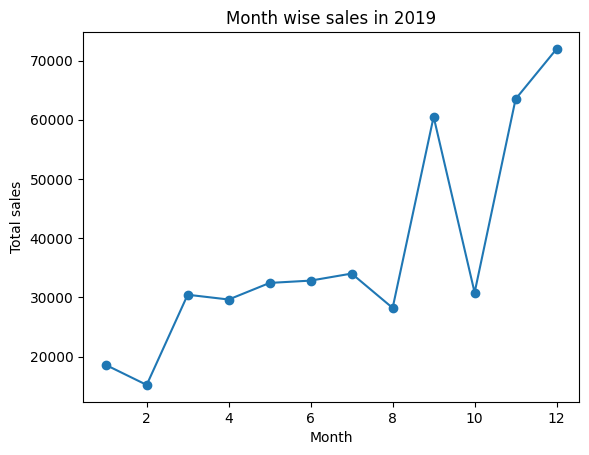

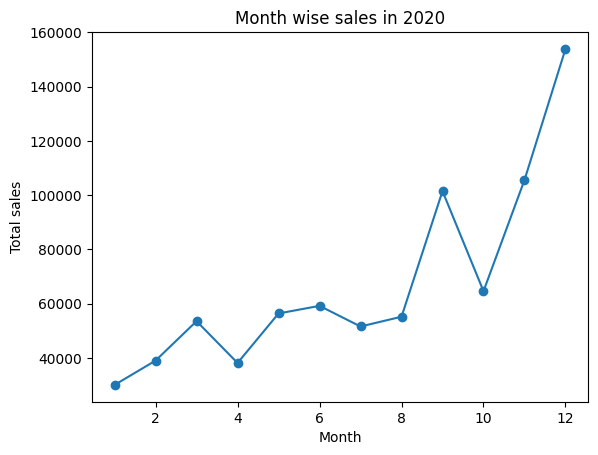

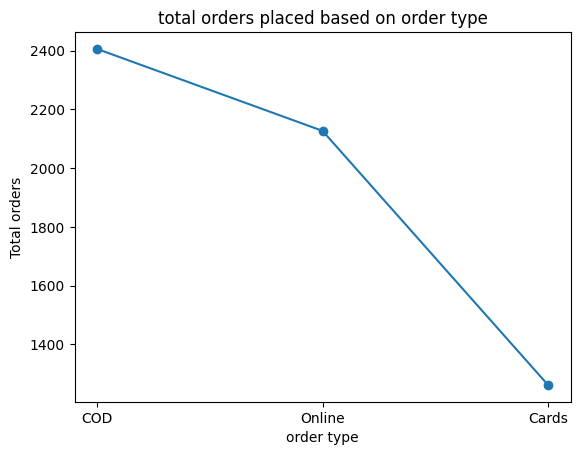

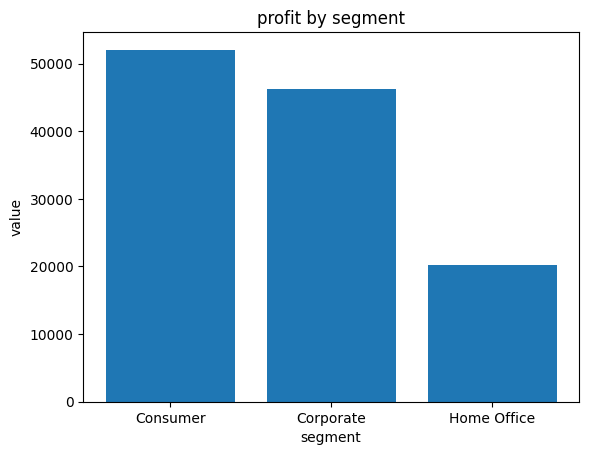

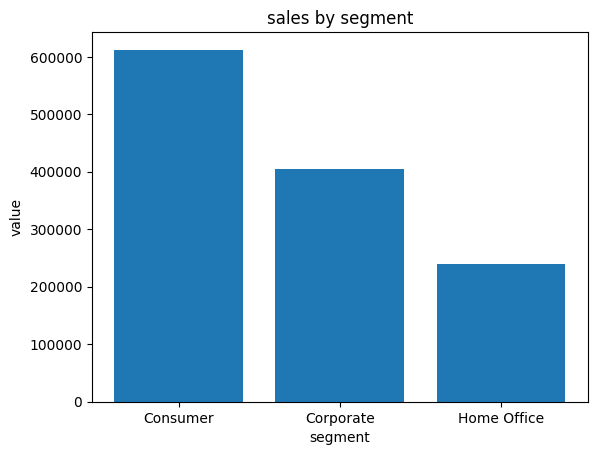

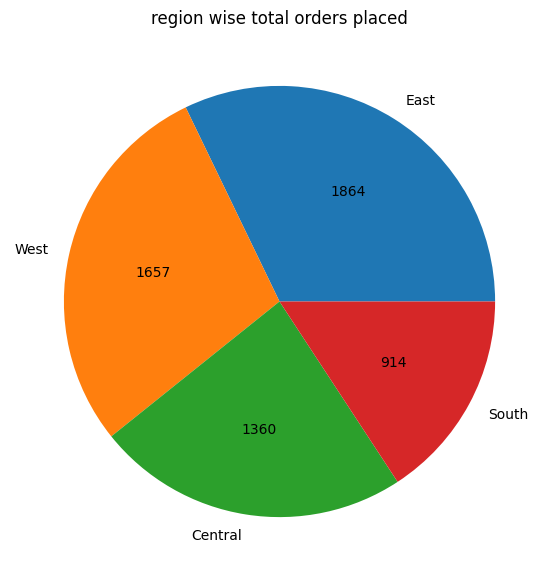

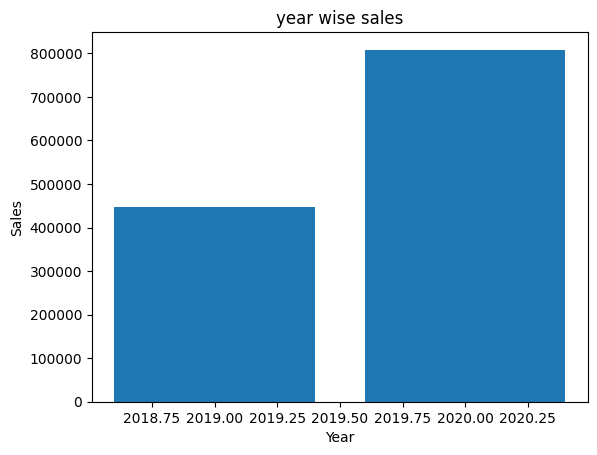

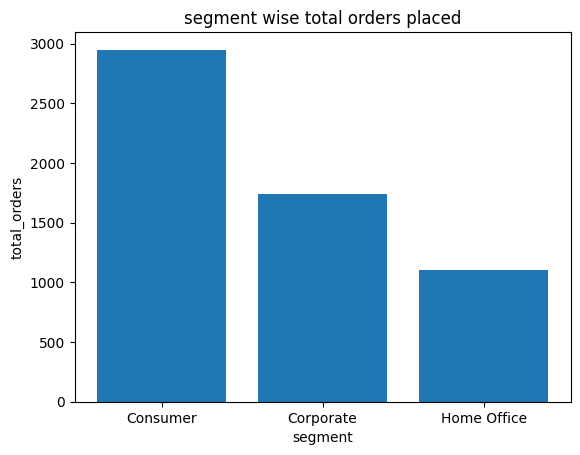

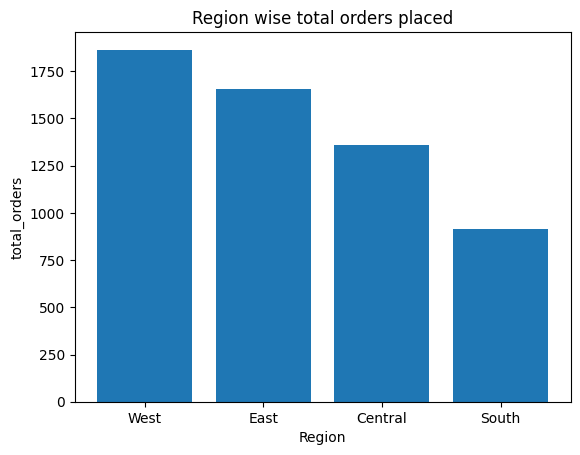

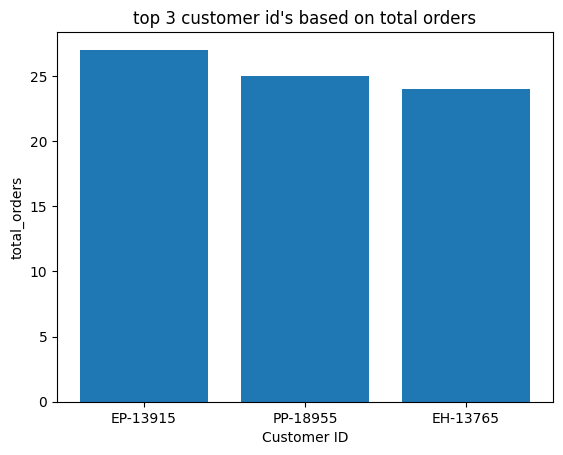

In [6]:
print("analysis level-5:-")
import matplotlib.pyplot as plt
x=non_out['19_Month'].dropna().unique()
y=non_out.groupby('19_Month')['Sales'].sum().reset_index()['Sales']
fig, ax=plt.subplots()
ax.plot(x, y, marker='o',label='Data Points')
ax.set_title("Month wise sales in 2019")
ax.set_xlabel("Month")
ax.set_ylabel("Total sales")
plt.show()
x=non_out['20_Month'].dropna().unique()
y=non_out.groupby('20_Month')['Sales'].sum().reset_index()['Sales']
fig, ax=plt.subplots()
ax.plot(x, y, marker='o',label='Data Points')
ax.set_title("Month wise sales in 2020")
ax.set_xlabel("Month")
ax.set_ylabel("Total sales")
plt.show()
x=total['Payment Mode']
y=total['Total_orders']
fig, ax=plt.subplots()
ax.plot(x,y,marker='o',label='Data Points')
ax.set_title("total orders placed based on order type")
ax.set_xlabel("order type")
ax.set_ylabel("Total orders")
plt.show()
linechart1=non_out.groupby('Segment')['Profit'].sum().reset_index()
linechart2=non_out.groupby('Segment')['Sales'].sum().reset_index()
chart=pd.merge(linechart2,linechart1 ,on="Segment")
plt.bar(chart['Segment'],chart['Profit'])
plt.xlabel('segment')
plt.ylabel('value')
plt.title("profit by segment")
plt.show()
plt.bar(chart['Segment'],chart['Sales'])
plt.xlabel('segment')
plt.ylabel('value')
plt.title("sales by segment")
plt.show()
fig,ax=plt.subplots(figsize=(10,7))
ax.pie(non_out['Region'].value_counts(),labels=non_out['Region'].unique(),autopct=lambda pct: str(int(round(pct * sum(non_out['Region'].value_counts()) / 100))))
ax.set_title("region wise total orders placed")
plt.show()
data=non_out.groupby('Year')['Sales'].sum().reset_index()
plt.bar(data['Year'],data['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("year wise sales")
plt.show()
plt.bar(total_orders['Segment'],total_orders['Total Orders'])
plt.xlabel('segment')
plt.ylabel('total_orders')
plt.title("segment wise total orders placed")
plt.show()
plt.bar(total_orders1['Region'],total_orders1['Total Orders'])
plt.xlabel('Region')
plt.ylabel('total_orders')
plt.title("Region wise total orders placed")
plt.show()
plt.bar(total_orders2['Customer ID'].head(3),total_orders2['Total Orders'].head(3))
plt.xlabel("Customer ID")
plt.ylabel('total_orders')
plt.title("top 3 customer id's based on total orders")
plt.show()





Conclusion:From the above charts and trends we can observe that total orders wise , total sales the profit wise west region is in top 1 position
and also consumer segment has bought the highest overall sales and profit , the production in this certain area should be improved and charges
through payments should be reduced so that more orders may be placed and more care should be taken on demanding products , and demand brought
customers 
